In [2]:
import ctypes #tablice niskopoziomowe

class DynamicArray:
    
    def __init__(self):
        self._n = 0 #liczba elementów
        self._capacity = 1 #rozmiar tablicy
        self._A = self._make_array(self._capacity) #właściwa tablica
        
    def __len__(self):
        return self._n
    
    def __str__(self):
        return 0
    
    def __getitem__(self,k):
        if not 0 <= k < self._n:
            raise IndexError('invalid index')
        return self._A[k]
    
    def append(self,obj):
        if self._n == self._capacity:
            self._resize(2*self._capacity)
        self._A[self._n] = obj
        self._n += 1
        
    def _resize(self,c):
        B = self._make_array(c)
        for k in range(self._n):
            B[k] = self._A[k]
        self._A = B
        self._capacity = c
        
    def _make_array(self,c):
        return (c*ctypes.py_object)()

    def insert(self, k, value):
        """function that inserts a value at k place"""
        if (self._n == self._capacity):
            self._resize(2*self._capacity)
        i = self._n - 1
        while (i >= k) :
           
            self._A[i + 1] = self._A[i]
            i -= 1
        self._A[k] = value
        self._n += 1
    
        
    def remove(self,value):
        """function removes first occurence of given value in array."""
        B = DynamicArray()
        B._resize(self._capacity)

        did_occur = False
        for i in range(self._n):
            if self._A[i] == value and not did_occur:
                did_occur = True
            else:
                B.append(self._A[i])
        if did_occur:
            self._A = B._A
            self._n -= 1

    def expand(self,seq):
        """append sequence (list) to array."""
        for i in range(len(seq)):
            self.append(seq[i])

    def __str__(self):
        """returns string representation of object."""
        string = '['
        for i in range(self._n-1):
            string += f"{self._A[i]},"
        string += f"{self._A[self._n-1]}]"
        return string



S=DynamicArray()
S.expand([10,4])
S.insert(1,3)
print(S[0])
print(len(S))
S.remove(10)
S_str = str(S)
print(type(S_str))
print(len(S))

def fun(A, B):           # assume that A and B have equal length
  n = len(A)                  
  count = 0
  for i in range(n):         
    total = 0
    for j in range(n):        
      for k in range(1+j):    
        total += A[k]
    if B[i] == total:
      count += 1
  return count

fun([1,2],[1,2])

10
3
<class 'str'>
2


0

In [2]:
#zadanie 2
import time

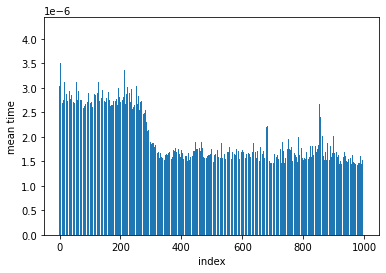

In [4]:
import time
import matplotlib.pyplot as plt

def pop_time(index, base_list):
    """calculates execution time of pop method for given index and list"""
    li = base_list[:]
    start = time.perf_counter()
    for i in range(10000):
        li.pop(index)
        li = base_list[:]
    t = time.perf_counter() - start
    #print(base_list)
    return t/10000

def draw(xs, ys):
    """draws a bar plot"""
    plt.bar(xs, ys)
    plt.xlabel("index")
    plt.ylabel("mean time")


base_list = [_ for _ in range(1000)]
xs = []
ys = []
for i in range(1000):
    xs.append(i)
    ys.append(pop_time(i, base_list))
    
draw(xs, ys)
#perfcount ! super, dzięki temu widać
#może 1 000 000 - za dużo, trwa mega długo

In [5]:
#Zadanie 3

In [6]:
def sum_n_by_n(lista):
    sum = 0
    for n in lista:
        for i in n:
            sum += i
    return sum


In [7]:
x = [[10,7,16,15],[7,3,2,7],[15,13,12,11],[0,3,2,7]]

In [8]:
sum_n_by_n(x)

130

In [9]:
#Zadanie 4

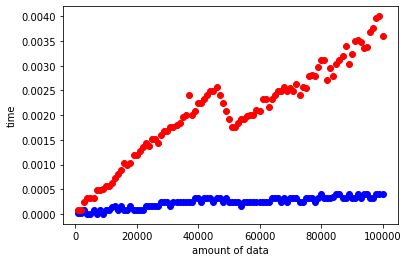

In [20]:
def time_extend(base_list, list2):
    """calculates the time of adding elements from list2 to base list using extend method"""
    list1 = base_list[:]
    start = time.time()
    for _ in range(100):
        list1.extend(list2)
        list1 = base_list[:]
    t = time.time() - start
    return t/100   

def time_append(base_list, list2):
    """calculates the time of adding elements from list2 to base list using append method"""
    list1 = base_list[:]
    start = time.time()
    for _ in range(100):
        for i in list2:
            list1.append(i)
        list1 = base_list[:]
    t = time.time() - start
    return t/100

def draw(x, ext, app):
    """draws a scatter plot"""
    plt.scatter(x, ext, color='blue')
    plt.scatter(x, app, color='red')
    plt.xlabel('amount of data')
    plt.ylabel('time')

app = []
ext = []
x = []
base_list = [0]*1000
for i in range(1000, 100001, 1000):
    list2 = [0] * i
    ext.append(time_extend(base_list, list2))
    app.append(time_append(base_list, list2))
    x.append(i)
draw(x, ext, app)
    

In [17]:
#zadanie 5

In [18]:
class Empty(Exception):
    pass

In [19]:
class Queue:
    DEFAULT_CAPACITY = 10

    def __init__(self):
        self._data = [None]*Queue.DEFAULT_CAPACITY
        self._size = 0
        self._front = 0

    def __len__(self):
        return self._size

    def is_empty(self):
        return self._size == 0

    def first(self):
        if self.is_empty():
            raise Empty('Queue is empty')
        return self._data[self._front]


    def enqueue(self, e):
        """adds element at the end of queue"""
        if self._size == len(self._data):
            self._resize(2 * len(self._data))
        last_ind = (self._front + self._size) % len(self._data)
        self._data[last_ind] = e
        self._size += 1

    def dequeue(self):
        """deletes element at the beginning of queue"""   
        if self.is_empty():
            raise Empty('Queue is empty')
        value = self._data[self._front]
        self._data[self._front] = None
        self._front = (self._front+1) % len(self._data) 
        self._size -= 1
        if 0 < self._size < len(self._data) // 6:    
            self._resize(len(self._data) // 3)
        return value

    def _resize(self,cap):
        """changes size of queue"""
        old = self._data    
        self._data = [None]*cap   
        walk = self._front
        for k in range(self._size): 
            self._data[k] = old[walk]
            walk = (1 + walk) % len(old)
        self._front = 0

Q = Queue()
Q.enqueue(5)
Q.enqueue(3)
print(len(Q))
Q.dequeue()
Q.is_empty()
Q.dequeue()
Q.is_empty()
Q.dequeue()


2


Empty: Queue is empty

In [ ]:
class Duoqueue:
    DEFAULT_CAPACITY = 10

    def __init__(self):
        self._data = [None]*Duoqueue.DEFAULT_CAPACITY
        self._size = 0
        self._front = 0

    def __len__(self):
        return self._size

    def is_empty(self):
        return self._size == 0

    def first(self):
        """returns first element of duoqueue"""
        if self.is_empty():
            raise Empty('Duoqueue is empty')
        return self._data[self._front]


    def add_first(self, element):
        """adds element at the beginning of duoqueue"""
        if self._size == len(self._data):
            self._resize(2 * len(self._data))
        self._data[(self._front - 1) % len(self._data)] = element   
        self._front = (self._front - 1) % len(self._data) 
        self._size +=1

    def delete_first(self):
        """deletes element at the beginning of duoqueue"""   
        if self.is_empty():
            raise Empty('Duoqueue is empty')
        value = self._data[self._front]
        self._data[self._front] = None
        self._front = (self._front + 1) % len(self._data)
        self._size -= 1
        return value

    def last(self):
        """returns last element of duoqueue"""
        if self.is_empty():
            raise Empty('Duoqueue is empty')
        return self._data[(self._front + self._size -1) % len(self._data)]

    def add_last(self, element):
        """adds element at the end of duoqueue"""
        if self._size == len(self._data):
            self._resize(2 * len(self._data))
        self._data[(self._front + self._size) % len(self._data)] = element
        self._size += 1


    def delete_last(self):
        """deletes element at the end of duoqueue"""
        if self.is_empty():
            raise Empty('Duoqueue is empty')
        value = self._data[(self._front + self._size - 1) % len(self._data)]  
        self._data[(self._front + self._size) % len(self._data)] = None
        self._size -= 1
        return value


    def _resize(self,cap):
        """changes size of queue"""
        old = self._data
        self._data = [None]*cap
        walk = self._front
        for k in range(self._size):
            self._data[k] = old[walk]
            walk = (1 + walk) % len(old)
        self._front = 0

In [ ]:
D = Duoqueue()
print(len(D))
D.add_last(5)
D.add_first(3)
D.add_last(15)
D.add_first(7)
print(D.first())
print(D.delete_last())
print(len(D))
print(D.is_empty())
print(D.last())

0
7
15
3
False
5


In [ ]:
#Zadanie 7

class Stack:
    def __init__(self):
        self._data = [] #nowy pusty stos
        
    def __len__(self):
        return len(self._data)
    
    def is_empty(self):
        return len(self._data)==0
    
    def push(self,e):
        self._data.append(e)
    def top(self):
        if self.is_empty():
            raise Empty('Stack is empty')
        return self._data[-1]
    
    def pop(self):
        if self.is_empty():
            raise Empty('Stack is empty')
        return self._data.pop()  

In [ ]:
def check_HTML(string):
    """function that checks if all HTML tags are at the right place."""
    S = Stack()
    j = string.find('<') 
    while j != -1:
        k = string.find('>', j+1)
        if k == -1:
            return False
        tag = string[j+1:k] 
        if not tag.startswith('/'): 
            S.push(tag)
        else:  
            if S.is_empty():
                return False
            if tag[1:] != S.pop( ):
                return False
        j = string.find('<', k+1)
    return S.is_empty( )

In [ ]:
html_test = """
<body>
<center>
<h1> The Little Boat </h1>
</center>
<p> The storm tossed the little
boat like a cheap sneaker in an
old washing machine. The three
drunken fishermen were used to
such treatment, of course, but
not the tree salesman, who even as
a stowaway now felt that he
had overpaid for the voyage. </p>
<ol>
<li> Will the salesman die? </li>
<li> What color is the boat? </li>
<li> And what about Naomi? </li>
</ol>
</body>
"""
check_HTML(html_test)


False

In [ ]:
#zadanie 8

In [ ]:
def permutation(n:int):
    li = list(range(1,n+1))
    c = [0] * n

    print(li)
    i = 1
    while i < n:
        if c[i] < i:
            j = c[i] if i % 2 else 0
            li[j], li[i] = li[i], li[j]
            print(li)
            c[i] += 1
            i = 1
        else:
            c[i] = 0
            i += 1

In [ ]:
def permutation2(n:int):
    """function that gives all possible permutations of numbers from 1 to n"""
    li = list(range(1,n+1))
    S = Stack()
    i = 0
    perms = []
    while i < n:
        perms.append(li.pop(0))
        S.push(i)
        i = 0
        if len(li) == 0:
            print(perms)
            while i == len(li) and S:
                i = S.pop()
                li.append(perms.pop())
                i += 1


In [ ]:
#permutation(3)
permutation2(3)


[1, 2, 3]
[1, 3, 2]
[2, 3, 1]
[2, 1, 3]
[3, 1, 2]
[3, 2, 1]
